<a href="https://colab.research.google.com/github/sirleudo/sigmoidal_data_science/blob/master/Regress%C3%A3o%20Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/sirleudo/sigmoidal_data_science/blob/master/logo_pensatah.png?raw=true">

#### **Data Science na Prática 2.0**
*by Sirleudo Evaristo*

# Regressão Linear

Uma análise de regressão estuda a relação existente entre uma variável dependente e uma ou mais variáveis independentes.

### Regressão Linear Simples com o `scikit-learn`


In [3]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

# importar aquivo csv
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")

# ver as primeiras entradas
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


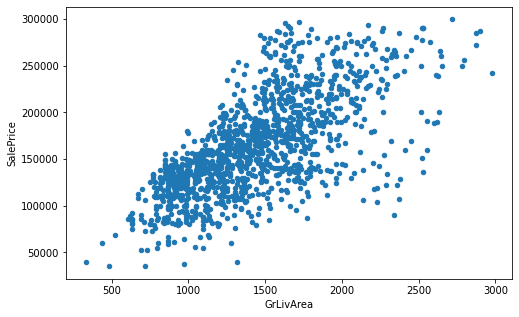

In [8]:
# plotae gráfico de dispersão
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)

plt.show()

In [9]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [11]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df['GrLivArea']
y = df['SalePrice']

# 3.1. dibidir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

ValueError: ignored

In [14]:
print("df:\t\t", df.shape)

print("X:\t\t", X.shape)

print("X (reshape):\t", X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


In [17]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df['GrLivArea'].values.reshape(-1, 1)
y = df['SalePrice']

# 3.1. dibidir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. fit do modelo (treinar)
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Interceptor:\t", model.intercept_)

Coeficiente:	 [81.33224979]
Interceptor:	 47281.87788683821


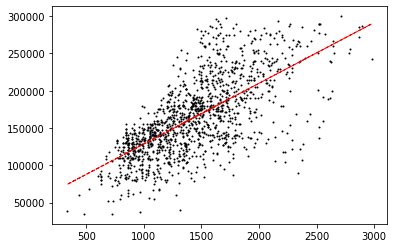

In [22]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color="black")
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

plt.show()

In [24]:
# 5. fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [25]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.4808443059402623
MAE:		 29260.46350462987
MSE:		 1516817517.538818


# Regressão Linear Múltipla

O raciocínio usado na Regressão Linear Múltipla é exatamente o mesmo que vimos com a anterior. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
# importar arquivo csv
df = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho de df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [32]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. escolher os hyperparameters
model = LinearRegression()

# 3. eparar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)


In [33]:
print("df:\t\t", df.shape)

print("X:\t\t", X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


In [34]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Interceptor:\t", model.intercept_)

Coeficiente:	 [-9.86375046e+01  5.41081358e-01  1.57853847e+04  4.28918923e+03
  3.37590415e+02  2.23430745e+02  2.48641221e+01 -1.59127701e+00
  7.76591320e-01  2.40494364e+01  2.56677305e+01  3.10469116e+01
 -3.39291680e+01  2.27854741e+01 -4.23638473e+02 -5.58204635e+03
  6.66466016e+01 -1.47694508e+03 -1.14312017e+04 -1.60760842e+04
  5.85954026e+03  3.13027638e+03  4.71942909e+03  1.69406109e+01
  1.13539693e+01 -1.21011693e+01  4.34568665e+00  1.25762944e+01
  3.75129146e+01  7.19543428e+01 -3.56723698e+00 -2.91862688e+02
 -2.24153136e+02]
Interceptor:	 -715017.108463891


In [41]:
# verificar desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.6703172972726434
MAE:		 22716.11058446238
MSE:		 2190783761.799889
